 Written by Federica B. Bianco @fedhere
 NYU CUSP PUI

 Assignment 1 Homework 4

 This is a skeleton & instruction notebook

-  GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
 _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
-  For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
-  Describe the behavior you see in the plots in terms of the law of large numbers.
-  PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
 Extra Credit: FIT a gaussian to the distribution of means            

In [36]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## choose which distributions to use 

In [37]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']


## and which mean to give it

In [38]:
mymean = 100

# Let's see what this distribution looks like, what is the PDF, and how are the moments defined. Wikipedia is great for this! 

![1](chisq1.png)

![2](chisq2.png)

# Then lets look at the numpy random sampling package to see how I create the distribution
http://docs.scipy.org/doc/numpy/reference/routines.random.html
http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.chisquare.html#numpy.random.chisquare



In [39]:
# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

## I am making a dictionary to host the distributions.

that is only one possible option. with a dictionary I can easily inspect the distribution I want by its name: it is a very human friendly data storage. In this example I am only using a single distribution, so for me it is overkill, but if I were doing the whole exercise with 5 or 6 distributions it would be useful!

Lets start by looking at a single chi sq distribution

Text(0.5,0,'x')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


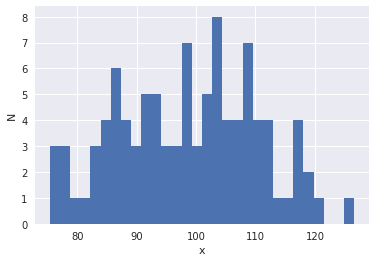

In [40]:
# Note: I am adding imports here, to show the workflow: 
# at this point I realize what packages I need and I import them. 
# but this is a PEP8 violation. 
# It is a good habit to put the includes at the top 
# so the code fails right away if the packages are missing. 
# Otherwise a user may have a piece of code running for a long time, 
# and then fail when the package cannot be imported... 
# (unless they are only imported under conditions, e.g. in an if statement)

import numpy as np
md = {}
# md is an empty disctionary
md['chisq'] = np.random.chisquare(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

### Figure 1: Chi sq distribution: df = 100, N=100

## let numpy calculate what the mean and stdev of this distribution are

In [41]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 98.65, standard deviation: 11.71


## Now let's do it for 100 Chisq distributions
we want distributions of different sizes (all integers between 10 and 2000)

In [44]:
#mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)

#replaced prof.federica's logic with something that allows to get 100 samples with non-duplicating values of n
import random
random.seed(777)
myrange=list(range(11,2000))
mysize=np.array(random.sample(myrange, 100))
print (mysize, mysize.shape)

[ 480  924  923  765 1189  563 1713  699 1112 1551   92 1900 1879 1379 1285
 1131  808 1242  602 1806  258 1914  244 1428  170 1829  693  223 1765 1526
 1922   13 1724 1328 1192  703  599 1207  558  230 1302 1375 1794  440  650
 1037  268 1678 1672 1694  860 1212 1655   80  723 1259  313 1191 1088  167
 1130 1366  574 1790 1598 1424 1027  204 1133  933  355   33  910  536  457
 1362 1166  795  192  782  375 1959  994 1537  141 1109  817 1826 1159 1917
  666  638  395  364  264 1146 1718 1203   23  976] (100,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


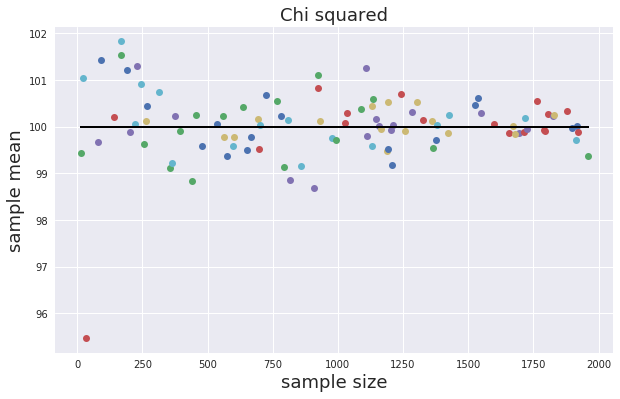

In [45]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 2: Plotting the sample mean of 100 various sized chi-squared samples. By the law of large numbers, after repeated sampling from chi-squared distribution,  the sample means tend to closer to the distribution's population mean which is set at 100.

# now the histogram of the mean of all samples: 
## this requires some data wrangling, since i put the data in a dictionary which is a user friendly data structure, but perhaps not the most machine friendly one

a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


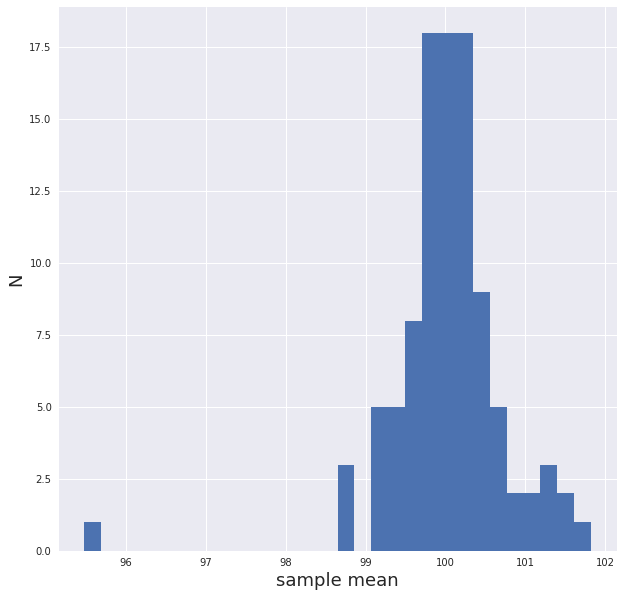

In [46]:
allmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 3: The distribution of 100 sample means, sampled from the chi-squared distribution, start to approach the shape of the gaussian distribution as expect from the Central Limit Theorem.

# Do it for the Normal distribution


## Generate 100 samples from the normal distribution

In [47]:
##your code here... 
#create a dictionary for the normal distribution
md['gaus']={}

#mysize_2 = (2000 / (np.array(range(1,101)))).astype(int)
mysize_2=np.array(random.sample(myrange, 100))

#generate 100 samples
for n in mysize_2:
    md['gaus'][n]= np.random.normal(loc=mymean,size=n)
print(mysize_2)

[1212 1818  553 1336  557 1703   32  356 1441  256 1656 1862 1326 1029  800
  266 1349 1368 1030 1683  842  875  828  922  713 1218 1399 1322 1297 1136
  741 1395 1119 1250 1047  118 1261 1662  120 1824 1693  776  597 1854 1201
 1720 1919 1055 1438  899  319 1400  599 1452 1365 1014 1413 1872 1866 1718
 1895  821   37 1778  586 1012  744 1068 1319  990  335  293  675  176 1897
  591  627  884  331 1853 1151 1224  921 1175  354  188  956 1594  157  705
  210  802 1913 1376 1243 1536  423 1267  278 1327]


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


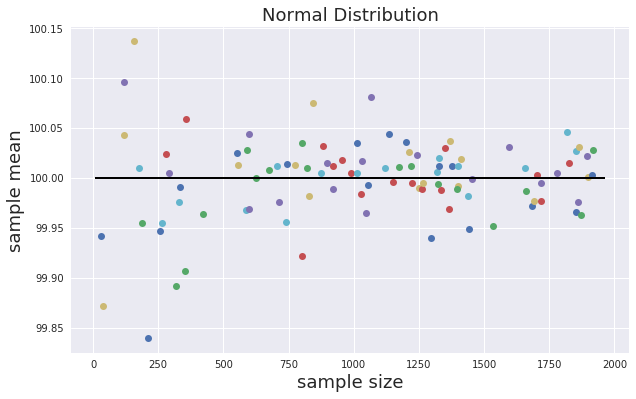

In [48]:
# save the means for plotting later    

md['gaus']['means'] = {}
axnorm_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['gaus']:
    if not type(nn) == str:
        md['gaus']['means'][nn] = md['gaus'][nn].mean()
        #and plot it
        axnorm_mu_n.plot(nn, md['gaus']['means'][nn], 'o')
        axnorm_mu_n.set_xlabel('sample size', fontsize=18)
        axnorm_mu_n.set_ylabel('sample mean', fontsize=18)
        axnorm_mu_n.set_title('Normal Distribution', fontsize=18)
        axnorm_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 4: Plotting the sample mean of 100 various sized gaussian samples. By the law of large numbers, after repeated sampling from gaussian distribution, the sample means tend to closer to the distribution's population mean which is set at 100.

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


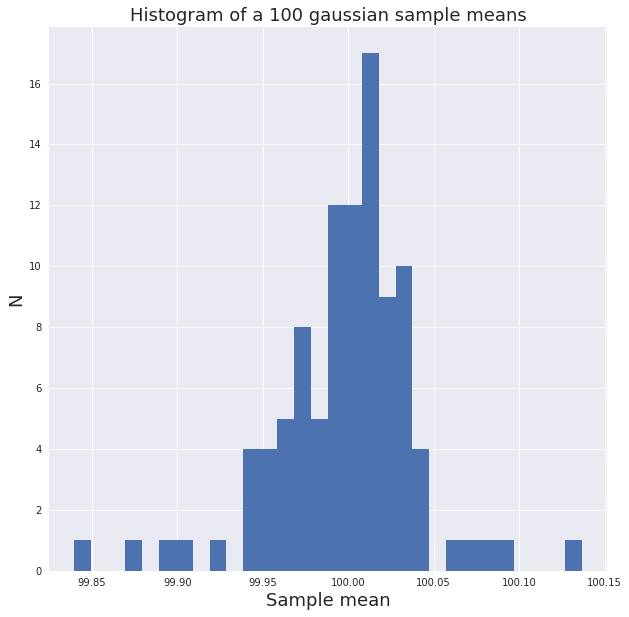

In [49]:
allmeans_gaus = list(md['gaus']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_gaus,bins=30)
pl.title('Histogram of a 100 gaussian sample means' , fontsize = 18)
pl.xlabel('Sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 5: The histogram of 100 sample means, drawn from the gaussian distribution, display a gaussian distribution by the Central Limit Theorem.

# Do it for the Poisson distribution

In [50]:
##your code here... 
#create a dictionary for the normal distribution
md['pois']={}

#generate 100 samples
for n in mysize_2:
    md['pois'][n]= np.random.poisson(lam=mymean,size=n)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


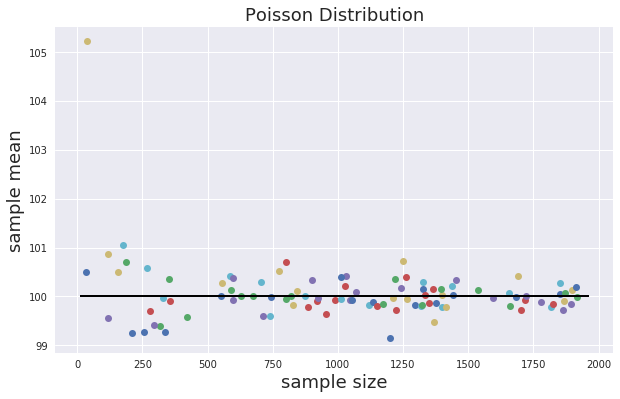

In [51]:
# save the means for plotting later    

md['pois']['means'] = {}
axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['pois']:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()
        #and plot it
        axpois_mu_n.plot(nn, md['pois']['means'][nn], 'o')
        axpois_mu_n.set_xlabel('sample size', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean', fontsize=18)
        axpois_mu_n.set_title('Poisson Distribution', fontsize=18)
        axpois_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 6: Plotting the sample mean of 100 various sized poisson samples. By the law of large numbers, after repeated sampling from poisson distribution,  the sample means tend to closer to the distribution's population mean which is set at 100.

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


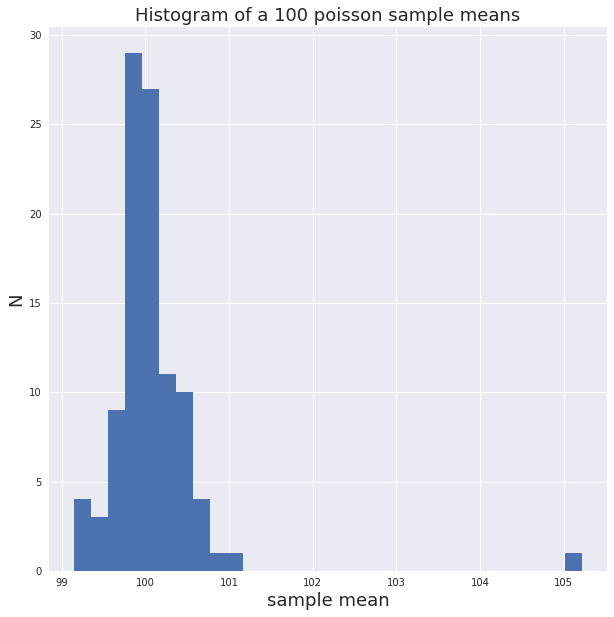

In [52]:
allmeans_pois = list(md['pois']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_pois,bins=30)
pl.title('Histogram of a 100 poisson sample means' , fontsize = 18)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## Figure 7: The distribution of 100 sample means, sampled from the Poisson distribution, start to approach the shape of the gaussian distribution.

# Do it for the Binomial distribution

In [53]:
##your code here...
md['binom']={}

#i want to achieve a mean of 100 and the binomial's mean would use n*p
num=200
pick=0.5

#generate 100 samples
for n in mysize_2:
    md['binom'][n]= np.random.binomial(n=num,p=pick,size=n)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


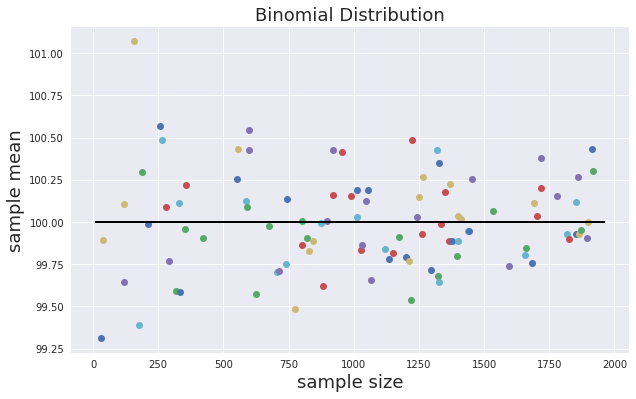

In [54]:
md['binom']['means'] = {}
axbinom_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['binom']:
    if not type(nn) == str:
        md['binom']['means'][nn] = md['binom'][nn].mean()
        #and plot it
        axbinom_mu_n.plot(nn, md['binom']['means'][nn], 'o')
        axbinom_mu_n.set_xlabel('sample size', fontsize=18)
        axbinom_mu_n.set_ylabel('sample mean', fontsize=18)
        axbinom_mu_n.set_title('Binomial Distribution', fontsize=18)
        axbinom_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 8: Plotting the sample mean of 100 various sized binomial samples. By the law of large numbers, after repeated sampling from binomial distribution,  the sample means tend to closer to the distribution's population mean which is set at 100.

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


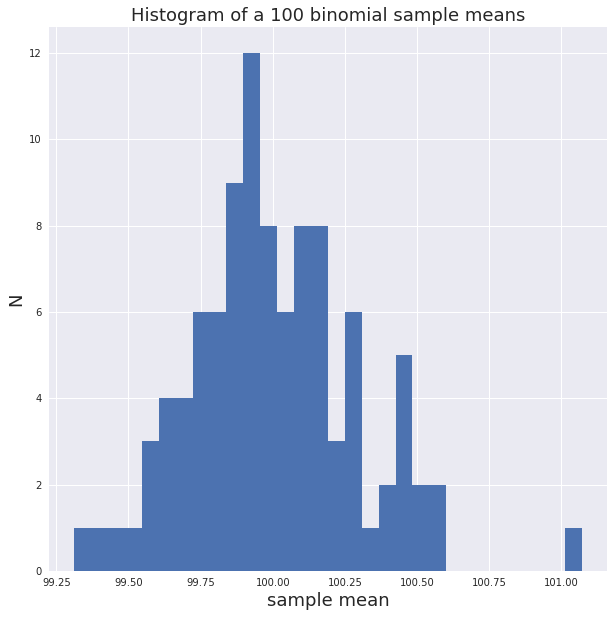

In [55]:
allmeans_binom = list(md['binom']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_binom,bins=30)
pl.title('Histogram of a 100 binomial sample means' , fontsize = 18)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

# Do it for another distribution

## i'll be using a logistic distribution

In [56]:
##your code here...
md['logis']={}

#generate 100 samples
for n in mysize_2:
    md['logis'][n]= np.random.logistic(loc=mymean,size=n)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


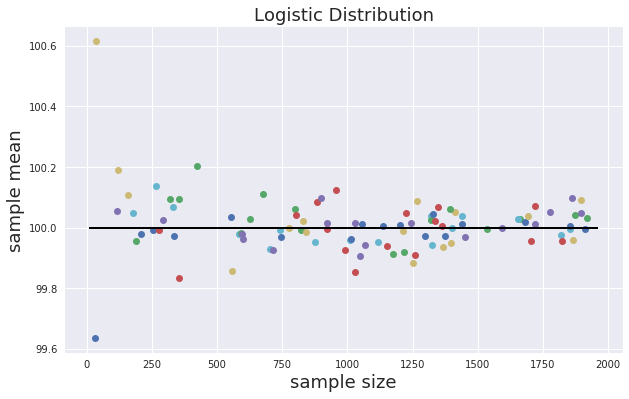

In [57]:
# save the means for plotting later    

md['logis']['means'] = {}
axlogis_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['logis']:
    if not type(nn) == str:
        md['logis']['means'][nn] = md['logis'][nn].mean()
        #and plot it
        axlogis_mu_n.plot(nn, md['logis']['means'][nn], 'o')
        axlogis_mu_n.set_xlabel('sample size', fontsize=18)
        axlogis_mu_n.set_ylabel('sample mean', fontsize=18)
        axlogis_mu_n.set_title('Logistic Distribution', fontsize=18)
        axlogis_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 10: Plotting the sample mean of 100 various sized samples drawn from the logistic distribution. By the law of large numbers, after repeated sampling from the logistic distribution, the sample means tend to closer to the distribution's population mean which is set at 100.

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


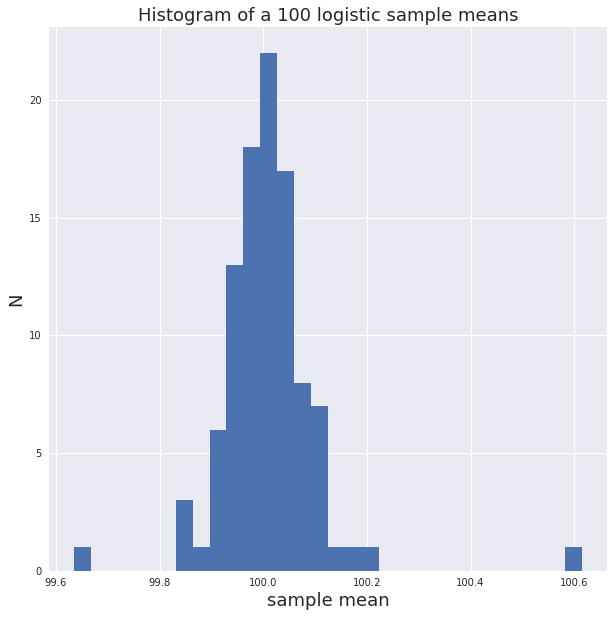

In [58]:
allmeans_logis = list(md['logis']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_logis,bins=30)
pl.title('Histogram of a 100 logistic sample means' , fontsize = 18)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## plotting all five distribution sample means

In [62]:
import scipy.stats as stats
mean_mean=[]
#distribution means
for x in md:
     mean_mean.extend(list(md[x]['means'].values()))
mean_mean=sorted(mean_mean)
all_dist_mean=np.array(mean_mean).mean()
all_dist_std=np.array(mean_mean).std()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


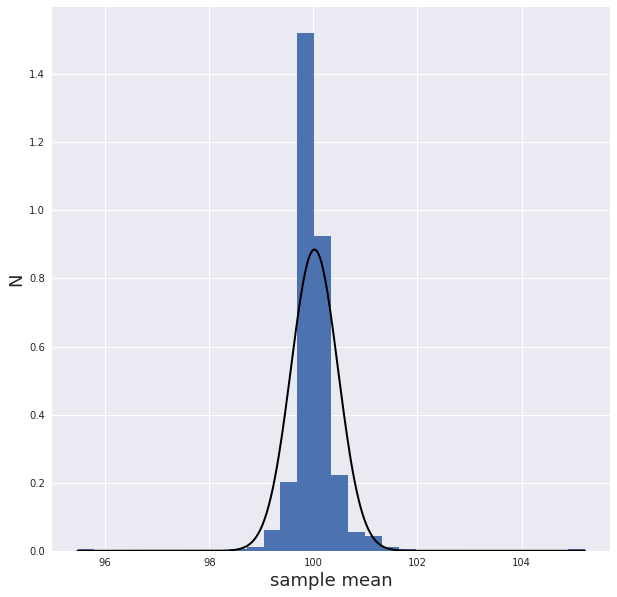

In [63]:
x = np.linspace(np.array(mean_mean).min(), np.array(mean_mean).max(), len(mean_mean))
p = stats.norm.pdf(x, all_dist_mean, all_dist_std)
pdf = stats.norm.pdf(mean_mean, all_dist_mean, all_dist_std)
pl.figure(figsize=(10, 10))
pl.hist(mean_mean,bins=30,normed=True)
plt.plot(x, p, 'k', linewidth=2)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.show()

### Figure 11: When you draw the histogram of all the sample, we get a familiar shape of the Gaussian distribution.